In [87]:
#functions

import math
import random


# makes a ticket
def ticket_generator(t, o, a):
    ticket={
        'time': t,
        'owner': o,
        'action': a,
    }
    return ticket;


# depending on parameter (spread or cure), generates tau
def nextTime(rateParameter, n):
    taus=[0]*n
    for i in range(0,n): #start at zero, stops just short of n
        taus[i]=-math.log(1.0 - random.random()) / rateParameter
    return taus #generates n-length list, starting at index 0


#writes the edges to a network of n ppl where everyone is connected to everyone else 
def network_writer(n):
    connect=[0]*n
    for i in range(0, n): 
        a=list(range(n)) #generating a list that goes from 0 to n-1
        a.remove(i) #individual removes themselves from the network
        connect[i]=a #corresponds to the list of people person i is linked to
    return connect; #returns a list of lists with all the connections in the network

def timechecktickethandler(prop_inf, ppl_state, num_ppl, check_acc):
    prop_inf[check_acc]=sum(ppl_state)/num_ppl


#ONCE NETWORKS ARE NOT SMALL WORLD, WILL NEED TO PASS IN CONNECT TO FUNCTION TO SEE WHO CAN BE INFECTED BY THE OWNER 
#(ow) AND TO GENERATE THE CORRECT LENGTH FOR Ts
#processes spread/infection tickets, returning a new timeline (with added tickets) and an updated list of states
def spreadtickethandler(tic, timeline, spreadparam, cureparam, ppl_state, t_max): #HEREEEEE
    ow=tic['owner']
    targ=tic['action'] #this action should not be -1 bc this is passed to spread ticket handler
    if (ow==targ):
        print('ow=targ, {:d}={:d}' .format(ow,targ))
#1
    if(ppl_state[ow]!=1):
        print('Error -- individual {:d} is not infected, but was passed to spreadtickethandler!' .format(ow))
        #break #is there a printf / how do you raise an error?  #SOMEHOW RAISE AND ERROR AND ESC
    else:
#2
        t=tic['time']
        if(ppl_state[targ]==1):
            print('{:d} is already infected! at time {:f}' .format(targ,t)) #targ=targ #just to make python shut up NOT REAL CODE
        else:
            ppl_state[targ]=1 #Set targ to be infected
            num_ppl=len(ppl_state) #number of people
            ts=[t]*(num_ppl-1) #list of t repeated num_ppl-1 times
            nT=nextTime(spreadparam, num_ppl-1) #generates taus
            cure_t=t+nextTime(cureparam, 1)[0] #using [0] in order to add an integer to t
            #curetimearray.append(cure_t) #curetime array -- purpose??
            spread_ts=[sum(x) for x in zip(ts,nT)] #using zip 
            acc=0
            for a in connect[targ]:
                if(spread_ts[acc]<cure_t and spread_ts[acc]<t_max): #HEREEE
                    tinf=ticket_generator(spread_ts[acc], targ, a)
                    add_to_timeline(tinf, timeline)
                acc=acc+1
            if cure_t<t_max: #HERE (unindent 2 lines below)
                tcure=ticket_generator(cure_t, targ, -1) #cure ticket
                add_to_timeline(tcure, timeline)
#3
        #infected_count=sum(ppl_state) #will have something that checks the infected count at certain time intervals
#4
        spread_t2=t+nextTime(spreadparam,1)[0]
        cure_t_ow=t_max+1 #just so we don't get an error is cure_t_ow isn't generated in the while loop bc it's too big
        i=timeholder
        curefound=0 
        #looking for the curetime of each individual
        while curefound==0 and i<(len(timeline)-1): 
            tim=timeline[i]
            if(tim['owner']==ow): 
                if(tim['action']==-1):
                    cure_t_ow=tim['time']
                    curefound=1 #stop when cure is found
            i=i+1 
        if(spread_t2<cure_t_ow and spread_t2<t_max): #HEEREEE
            spread2tic=ticket_generator(spread_t2, ow, targ)
            add_to_timeline(spread2tic, timeline)
        return [timeline, ppl_state];
            
        
    
#processes cure tickets, returning the new states of ppl        
def curetickethandler(tic, ppl_state):
    ow=tic['owner']
    ppl_state[ow]=0
    #infected_count=sum(ppl_state) #will have something that checks the infected count at certain time intervals
    return ppl_state

#adds new tickets to timeline
def add_to_timeline(tic, tim):
    if not tim:
        return [tic]
    ind=len(tim)-1
    end=0
    while (tic['time']<tim[ind]['time'] and end==0):
        ind=ind-1 
        if(ind<0):
            end=1
    ind=ind+1
    tim.insert(ind, tic)
    return tim

def new_ind(ind, ow):
    if(ind>ow):
        ind=ind-1
    return ind

In [88]:

#Test ticket generator

tic=ticket_generator(1,1,1)
timeline=[]
print(timeline)

timeline=add_to_timeline(tic,timeline)

tic1=ticket_generator(4,1,1)
timeline=add_to_timeline(tic1,timeline)
#print(timeline)

tic2=ticket_generator(5,1,1)
timeline=add_to_timeline(tic2,timeline)
#print(timeline)

tic3=ticket_generator(3.5,1,1)
timeline=add_to_timeline(tic3,timeline)
#print(timeline)

tic4=ticket_generator(7,1,1)
timeline=add_to_timeline(tic4,timeline)
print(timeline)



[]
[{'time': 1, 'owner': 1, 'action': 1}, {'time': 3.5, 'owner': 1, 'action': 1}, {'time': 4, 'owner': 1, 'action': 1}, {'time': 5, 'owner': 1, 'action': 1}, {'time': 7, 'owner': 1, 'action': 1}]


In [89]:
#main

del timeline #deletes timeline from previous run
t_max=2 #we want to go to 500 time units
sick_ind=5
spreadparam=.5
cureparam=.3
curetimearray=[];
timeline=[]
num_ppl=100
ppl_state=[0]*num_ppl 
ppl_state[sick_ind]=1 #make a record of everyone's current state, starting with 1 infected person
connect=network_writer(num_ppl) #make a network of connections btwn the ppl -- everyone is connected to everyone rn
tinfinit=nextTime(spreadparam, num_ppl-1) #generate the time of the first infection THIS IS NOW ALL THE TIMES -- one for each
tcureinit=nextTime(cureparam, 1)[0] #generate the time of sick_ind's cure
while(all(i < tcureinit for i in tinfinit)): #for the very rare case that no individuals get infected before individual 0 gets cured
    tcureinit=nextTime(cureparam,1) #ensure that that time occurs after patient 0 has infected someone -- just so our sim goes somewhere
smallinds=[] #isolate only those times that are smaller than cure time
acc=0
for i in connect[sick_ind]:        
    if tinfinit[acc]<tcureinit:
        smallinds.append(i)
    acc=acc+1    
timeline=[]#initialize the timeline before any tickets are added
for i in range (len(smallinds)):
    init_inf=ticket_generator(tinfinit[new_ind(smallinds[i], sick_ind)], sick_ind, smallinds[i])#generate a ticket for the first infection 
    timeline=add_to_timeline(init_inf, timeline) #put these 2 tickets on timeline
#print(timeline)
init_cure=ticket_generator(tcureinit, sick_ind, -1) # generate a ticket for the first cure
timeline=add_to_timeline(init_cure, timeline)
l=list(range(0, (t_max)*100, 1)) 
l2=[.01]*len(l)
check_times=[a*b for a,b in zip(l,l2)] #our list goes from 0 to tmax w intervals of .1
for i in check_times:
    tchecktic=ticket_generator(i, -2, -2) #-2 here indicates that this is a time-check ticket
    add_to_timeline(tchecktic, timeline)
prop_inf=[0]*len(check_times)
#print(timeline)
timeholder=0 #timeholder is the index where we are on the timeline (start at 0)
t=0 #we start at a time of 0 
check_acc=0



In [90]:
#ok time for the while loop
while t<t_max:
    print(t)
    if timeholder>(len(timeline)-1):
        print(sum(ppl_state)/num_ppl)
        print('end')
        break
    nexttic=timeline[timeholder] #look at the ticket corresponding to where we are on the timeline
    if (nexttic['action']==-1): #if it's a cure ticket, use the corresponding handler
        ppl_state=curetickethandler(nexttic, ppl_state)
    elif nexttic['action']==-2:
        timechecktickethandler(prop_inf, ppl_state, num_ppl, check_acc) #removed nettic bc unnecessary
        check_acc=check_acc+1
    else: #if it's a spread ticket, use the corresponding handler
        vec=spreadtickethandler(nexttic, timeline, spreadparam, cureparam, ppl_state, t_max) #HEEREEE
        timeline=vec[0]
        ppl_state=vec[1]
    t=nexttic['time'] #new time based on the ticket we just read

    
    timeholder=timeholder+1 #increment timeholder
    


0
0.0
0.0030941633228515047
0.008399522173670236
0.01
0.01280933449020307
0.01689784969272826
0.02
0.020790852568620767
0.03
42 is already infected! at time 0.033434
0.03343423299369188
0.034260977926068394
0.036468862090952375
0.037725305506682724
0.0384124360693896
0.04
0.0401458615050418
0.04309667619418673
0.04329790681564994
0.04383091327032079
0.04688759249074147
0.047772503752450256
0.04888319240727268
0.05
0.05204879288369277
0.05273759236505175
0.052783599002739295
0.05312512929218592
0.05379091193402007
0.05426036708684659
0.05428361977474226
0.05483366820098528
0.05686524308970017
0.05698471712338907
0.05713403043142086
0.05812583872087765
62 is already infected! at time 0.058171
0.05817090595331247
0.05894975662452185
0.06
0.06033247011655718
65 is already infected! at time 0.060692
0.06069151004393792
27 is already infected! at time 0.061148
0.061147613445974254
0.061349276270972586
0.06156313138216651
76 is already infected! at time 0.062648
0.06264756380892228
0.06350206

0.11789856176330844
16 is already infected! at time 0.118172
0.1181715072937788
58 is already infected! at time 0.118453
0.11845329284670807
13 is already infected! at time 0.118827
0.11882712502781964
11 is already infected! at time 0.119060
0.11905969121626751
45 is already infected! at time 0.119698
0.11969769941845348
46 is already infected! at time 0.119786
0.11978601450082549
0.12
91 is already infected! at time 0.120029
0.12002908727327796
52 is already infected! at time 0.120240
0.12024030254139939
0.12036648895269755
91 is already infected! at time 0.120489
0.12048945382296032
67 is already infected! at time 0.120685
0.1206847767178565
4 is already infected! at time 0.120754
0.12075395905137695
1 is already infected! at time 0.121062
0.12106219323152552
87 is already infected! at time 0.121596
0.12159618339451056
20 is already infected! at time 0.121707
0.12170669776271738
91 is already infected! at time 0.121782
0.12178165823497519
76 is already infected! at time 0.121829
0.1

0.15692530891435316
75 is already infected! at time 0.156932
0.15693178862235152
67 is already infected! at time 0.157137
0.15713724641428498
31 is already infected! at time 0.157180
0.1571797544242265
6 is already infected! at time 0.157991
0.15799073111484938
87 is already infected! at time 0.158034
0.15803391049653
36 is already infected! at time 0.158083
0.1580834507051464
97 is already infected! at time 0.158336
0.15833589030079562
5 is already infected! at time 0.158669
0.15866934263510651
18 is already infected! at time 0.159663
0.1596634913897637
64 is already infected! at time 0.159672
0.15967174813447235
84 is already infected! at time 0.159787
0.1597872710400085
21 is already infected! at time 0.159974
0.15997429815832054
0.16
0.16009493560284177
64 is already infected! at time 0.160198
0.160197998621961
38 is already infected! at time 0.160242
0.16024190314838194
32 is already infected! at time 0.160297
0.16029681112950034
51 is already infected! at time 0.160544
0.16054355

0.20544119155748658
82 is already infected! at time 0.205560
0.20555960148736468
81 is already infected! at time 0.205878
0.2058784549063728
26 is already infected! at time 0.205896
0.20589630603074807
51 is already infected! at time 0.206013
0.20601335545296073
19 is already infected! at time 0.206056
0.20605618480897306
14 is already infected! at time 0.206394
0.20639408805724357
48 is already infected! at time 0.207248
0.20724765385540736
18 is already infected! at time 0.207307
0.20730682843627585
52 is already infected! at time 0.207436
0.20743596718842142
39 is already infected! at time 0.207487
0.20748666435968494
33 is already infected! at time 0.207516
0.20751615481991317
10 is already infected! at time 0.208557
0.20855675663727558
93 is already infected! at time 0.208638
0.20863820556202045
52 is already infected! at time 0.208721
0.20872059800421996
74 is already infected! at time 0.208728
0.2087280151788467
79 is already infected! at time 0.208858
0.2088577168665125
76 is a

0.2312914786171063
0.23228607467967854
18 is already infected! at time 0.232324
0.23232411034477926
16 is already infected! at time 0.232377
0.23237660474357902
90 is already infected! at time 0.232778
0.23277793301227914
46 is already infected! at time 0.232887
0.23288662196027887
0 is already infected! at time 0.232959
0.23295935579426894
91 is already infected! at time 0.233207
0.23320718107998978
11 is already infected! at time 0.233427
0.23342663770723354
68 is already infected! at time 0.233505
0.2335046660668592
64 is already infected! at time 0.233543
0.2335426602123343
98 is already infected! at time 0.233556
0.23355616399465873
81 is already infected! at time 0.234447
0.23444749479332844
46 is already infected! at time 0.234455
0.2344547518837325
81 is already infected! at time 0.234534
0.2345340808876259
23 is already infected! at time 0.234870
0.23486984295153168
44 is already infected! at time 0.234951
0.23495138274210128
79 is already infected! at time 0.234960
0.23496006

0.26822811309809624
11 is already infected! at time 0.268278
0.2682783018082292
12 is already infected! at time 0.268486
0.26848640982060623
41 is already infected! at time 0.268551
0.268551079852724
39 is already infected! at time 0.268697
0.2686966369586204
98 is already infected! at time 0.268917
0.26891732555367065
74 is already infected! at time 0.269128
0.26912849300951097
86 is already infected! at time 0.269201
0.26920108777271123
23 is already infected! at time 0.269824
0.2698235131940277
0.27
78 is already infected! at time 0.270083
0.2700830605846841
34 is already infected! at time 0.270220
0.2702199047692655
75 is already infected! at time 0.270369
0.27036879128644686
30 is already infected! at time 0.270450
0.2704498009312815
34 is already infected! at time 0.270566
0.27056567057213293
49 is already infected! at time 0.270884
0.2708840625578623
91 is already infected! at time 0.270995
0.2709946296680403
17 is already infected! at time 0.271008
0.27100778255752866
75 is alr

0.30081855963304815
15 is already infected! at time 0.301002
0.3010024550580882
71 is already infected! at time 0.301313
0.3013125743704629
27 is already infected! at time 0.301324
0.301324378748157
2 is already infected! at time 0.301610
0.30160956533599104
24 is already infected! at time 0.301642
0.3016418336927447
23 is already infected! at time 0.301761
0.3017606265873546
39 is already infected! at time 0.301783
0.3017834711427413
25 is already infected! at time 0.302000
0.3019995695029454
88 is already infected! at time 0.302684
0.30268435445553415
69 is already infected! at time 0.302905
0.3029050385210772
69 is already infected! at time 0.303014
0.3030142432705145
68 is already infected! at time 0.303318
0.3033178354919445
16 is already infected! at time 0.304261
0.3042608700763662
50 is already infected! at time 0.304448
0.30444845058170167
25 is already infected! at time 0.304651
0.30465130066271406
51 is already infected! at time 0.304920
0.30491999833113465
88 is already inf

0.34087007664042546
30 is already infected! at time 0.341004
0.3410041889042136
4 is already infected! at time 0.341130
0.3411295846044332
53 is already infected! at time 0.341300
0.3413003148455489
95 is already infected! at time 0.341885
0.34188504728198676
59 is already infected! at time 0.341997
0.3419971999223499
91 is already infected! at time 0.342198
0.34219804252815633
14 is already infected! at time 0.342279
0.34227945960878486
74 is already infected! at time 0.342285
0.3422854104994561
53 is already infected! at time 0.342521
0.34252056515960616
59 is already infected! at time 0.342723
0.34272307666617313
33 is already infected! at time 0.342736
0.3427363226035365
31 is already infected! at time 0.342899
0.3428991274177714
21 is already infected! at time 0.343062
0.3430624674253474
24 is already infected! at time 0.343117
0.34311678281855573
61 is already infected! at time 0.343440
0.343440236086562
83 is already infected! at time 0.343573
0.34357323233899034
61 is already i

0.37133083144798673
72 is already infected! at time 0.371407
0.37140697991702937
0 is already infected! at time 0.371496
0.37149636176516426
97 is already infected! at time 0.371523
0.3715230362612737
49 is already infected! at time 0.371721
0.3717214455684089
25 is already infected! at time 0.371989
0.371989445955214
85 is already infected! at time 0.372076
0.3720756248480514
65 is already infected! at time 0.372325
0.372325325481074
34 is already infected! at time 0.372502
0.3725021237513857
30 is already infected! at time 0.372717
0.37271682019844116
9 is already infected! at time 0.372878
0.37287839942492984
61 is already infected! at time 0.373117
0.3731174058558166
36 is already infected! at time 0.373652
0.373652206395099
49 is already infected! at time 0.373652
0.37365236475566677
9 is already infected! at time 0.373760
0.37375977267258353
56 is already infected! at time 0.374444
0.374444074889344
11 is already infected! at time 0.374564
0.3745635457930838
25 is already infecte

29 is already infected! at time 0.402086
0.4020857300592196
95 is already infected! at time 0.402302
0.4023022091921344
85 is already infected! at time 0.402563
0.4025628515716407
72 is already infected! at time 0.402580
0.4025800926281463
30 is already infected! at time 0.402624
0.4026244208033844
69 is already infected! at time 0.402988
0.4029884060236051
25 is already infected! at time 0.402989
0.40298920422538864
32 is already infected! at time 0.403056
0.40305625519594274
47 is already infected! at time 0.403294
0.4032936431081682
42 is already infected! at time 0.403394
0.40339403255506745
30 is already infected! at time 0.403663
0.4036628015341666
92 is already infected! at time 0.403846
0.4038464408542628
55 is already infected! at time 0.403893
0.4038932399917198
92 is already infected! at time 0.404155
0.40415457082076056
57 is already infected! at time 0.404278
0.4042781219448091
16 is already infected! at time 0.404391
0.40439098137759877
50 is already infected! at time 0.4

0.43336991712206135
24 is already infected! at time 0.433436
0.43343645585153556
39 is already infected! at time 0.433582
0.4335820659542842
43 is already infected! at time 0.433589
0.43358942030198594
67 is already infected! at time 0.433803
0.4338031424847205
23 is already infected! at time 0.434341
0.434340913446501
49 is already infected! at time 0.434628
0.4346280184835239
56 is already infected! at time 0.435157
0.43515660884217444
0.43523603397428556
2 is already infected! at time 0.435291
0.43529090675242393
0.43550883521492156
22 is already infected! at time 0.435608
0.4356082950967235
56 is already infected! at time 0.435948
0.4359483399548474
71 is already infected! at time 0.435970
0.43596966320143743
57 is already infected! at time 0.436337
0.436336686637825
90 is already infected! at time 0.436376
0.4363758679466148
98 is already infected! at time 0.436830
0.4368301658128617
19 is already infected! at time 0.436841
0.43684097048378184
47 is already infected! at time 0.437

27 is already infected! at time 0.462724
0.46272358959138526
3 is already infected! at time 0.462889
0.4628894066150818
55 is already infected! at time 0.462918
0.4629177805609911
60 is already infected! at time 0.462940
0.46294036146358647
78 is already infected! at time 0.463257
0.46325675474475636
98 is already infected! at time 0.463361
0.46336111646549677
21 is already infected! at time 0.463404
0.46340400121533315
69 is already infected! at time 0.463437
0.4634369476071451
40 is already infected! at time 0.463525
0.4635248330629377
17 is already infected! at time 0.463662
0.46366221191115936
1 is already infected! at time 0.463683
0.4636830446135
71 is already infected! at time 0.463728
0.4637282380910754
3 is already infected! at time 0.463798
0.4637977997566913
64 is already infected! at time 0.464227
0.46422722740150857
96 is already infected! at time 0.464283
0.4642825432592798
40 is already infected! at time 0.464293
0.464292937982557
99 is already infected! at time 0.464490

0.5002808181305874
67 is already infected! at time 0.500412
0.5004117323412182
21 is already infected! at time 0.500529
0.5005290840645764
35 is already infected! at time 0.500743
0.5007425931920025
64 is already infected! at time 0.500772
0.5007717705992274
25 is already infected! at time 0.500783
0.5007832225360731
99 is already infected! at time 0.500922
0.5009222788106125
18 is already infected! at time 0.500988
0.5009883463901754
43 is already infected! at time 0.501363
0.5013625624120279
74 is already infected! at time 0.501605
0.501605441062897
34 is already infected! at time 0.501902
0.5019017255656368
89 is already infected! at time 0.502548
0.5025484049827604
5 is already infected! at time 0.502621
0.5026211902721455
21 is already infected! at time 0.502639
0.5026387647763256
16 is already infected! at time 0.503298
0.5032978438540681
81 is already infected! at time 0.503521
0.5035214950240504
89 is already infected! at time 0.503989
0.5039885222702468
42 is already infected!

0.5396061880783476
55 is already infected! at time 0.539723
0.5397232296511643
97 is already infected! at time 0.539741
0.5397406803013352
37 is already infected! at time 0.539875
0.5398745616795351
0.54
95 is already infected! at time 0.540294
0.5402939850571497
69 is already infected! at time 0.540456
0.5404564067866856
36 is already infected! at time 0.540834
0.5408344605062521
20 is already infected! at time 0.541015
0.5410153351334258
51 is already infected! at time 0.541362
0.541361718501145
18 is already infected! at time 0.541402
0.5414020853173772
58 is already infected! at time 0.541646
0.5416463676109969
18 is already infected! at time 0.541821
0.5418206975735864
47 is already infected! at time 0.542463
0.542462872168227
49 is already infected! at time 0.542600
0.5426001640428371
39 is already infected! at time 0.542793
0.5427928532260392
46 is already infected! at time 0.542983
0.5429834761910806
6 is already infected! at time 0.543542
0.5435417268065357
25 is already infec

0.582168695354389
87 is already infected! at time 0.582228
0.5822278028403112
83 is already infected! at time 0.582234
0.582233557866523
13 is already infected! at time 0.583358
0.5833583721144069
97 is already infected! at time 0.583444
0.5834439631499467
64 is already infected! at time 0.583773
0.5837729928250147
60 is already infected! at time 0.583857
0.5838572894706276
64 is already infected! at time 0.583858
0.5838575965737065
80 is already infected! at time 0.584103
0.5841026578821359
31 is already infected! at time 0.584115
0.5841147155823361
88 is already infected! at time 0.584302
0.5843022531723107
94 is already infected! at time 0.584468
0.5844684913972891
39 is already infected! at time 0.584529
0.5845285258388975
42 is already infected! at time 0.585075
0.5850745457294046
60 is already infected! at time 0.585408
0.5854082409221638
70 is already infected! at time 0.585411
0.5854110274641556
96 is already infected! at time 0.585676
0.5856755798975275
11 is already infected!

0.615866467011066
85 is already infected! at time 0.615915
0.6159154998946053
95 is already infected! at time 0.615966
0.6159664733849395
92 is already infected! at time 0.616027
0.6160269302965395
7 is already infected! at time 0.616203
0.6162025053389899
95 is already infected! at time 0.616309
0.6163091711093283
19 is already infected! at time 0.616856
0.6168564062434715
97 is already infected! at time 0.617177
0.6171772789476391
74 is already infected! at time 0.617445
0.6174445701422223
88 is already infected! at time 0.617496
0.6174961021963421
23 is already infected! at time 0.617498
0.6174978781566259
87 is already infected! at time 0.617570
0.6175702677558635
98 is already infected! at time 0.617907
0.6179068441135279
53 is already infected! at time 0.618031
0.6180312826700788
0 is already infected! at time 0.618045
0.6180448273244661
70 is already infected! at time 0.618129
0.6181292720855935
2 is already infected! at time 0.618199
0.6181985749064022
7 is already infected! at

0.6453921324440047
97 is already infected! at time 0.645398
0.6453978985084384
19 is already infected! at time 0.645537
0.6455374424292211
91 is already infected! at time 0.645833
0.6458334459734927
21 is already infected! at time 0.645897
0.6458969741478463
69 is already infected! at time 0.646137
0.6461367329884599
15 is already infected! at time 0.646383
0.6463827851892788
89 is already infected! at time 0.646559
0.6465589342688001
67 is already infected! at time 0.646712
0.6467118321400868
25 is already infected! at time 0.647204
0.6472039479938011
21 is already infected! at time 0.647228
0.6472276491259338
90 is already infected! at time 0.647436
0.6474364472287606
9 is already infected! at time 0.647443
0.6474426019482502
23 is already infected! at time 0.647472
0.6474720291283825
0.6474866141422312
32 is already infected! at time 0.647723
0.6477231360989206
86 is already infected! at time 0.648005
0.6480050739493952
89 is already infected! at time 0.648152
0.6481518518444371
50 

0.677320258877937
7 is already infected! at time 0.678241
0.6782407961307538
10 is already infected! at time 0.678642
0.6786416221987748
23 is already infected! at time 0.678887
0.6788868474715462
47 is already infected! at time 0.678901
0.6789009284239396
40 is already infected! at time 0.679080
0.6790800238928305
54 is already infected! at time 0.679435
0.6794348358111343
71 is already infected! at time 0.679466
0.6794659493929351
90 is already infected! at time 0.679679
0.6796786755743008
0.68
73 is already infected! at time 0.680558
0.6805579206233755
47 is already infected! at time 0.680874
0.6808736765510812
23 is already infected! at time 0.681018
0.6810175124857474
95 is already infected! at time 0.681085
0.6810848395593911
57 is already infected! at time 0.681087
0.6810869993673674
41 is already infected! at time 0.681158
0.6811579621399517
23 is already infected! at time 0.681225
0.6812249661988015
33 is already infected! at time 0.681238
0.6812382687611552
98 is already infe

0.7232387840377807
69 is already infected! at time 0.723364
0.7233638298804601
98 is already infected! at time 0.723558
0.7235581816395503
82 is already infected! at time 0.723873
0.7238727468025514
65 is already infected! at time 0.724336
0.7243357619367687
47 is already infected! at time 0.724407
0.7244065666198803
76 is already infected! at time 0.724442
0.7244417701151737
19 is already infected! at time 0.724596
0.7245964140383826
31 is already infected! at time 0.725280
0.7252796930654537
81 is already infected! at time 0.725637
0.7256374904608378
99 is already infected! at time 0.725707
0.7257066152895698
99 is already infected! at time 0.725856
0.7258563101689596
45 is already infected! at time 0.725986
0.7259856902328614
39 is already infected! at time 0.726055
0.7260551458112559
15 is already infected! at time 0.726502
0.7265019967372358
66 is already infected! at time 0.726556
0.7265561831450613
42 is already infected! at time 0.726694
0.7266944435264886
79 is already infecte

0.7687982438398425
73 is already infected! at time 0.768918
0.7689181426322929
58 is already infected! at time 0.768942
0.7689421599450346
46 is already infected! at time 0.768995
0.7689952938306728
13 is already infected! at time 0.769258
0.7692577729468688
49 is already infected! at time 0.769553
0.7695533514607868
40 is already infected! at time 0.769602
0.7696016190489042
22 is already infected! at time 0.769835
0.769834777358051
41 is already infected! at time 0.769888
0.7698875530058497
0.77
70 is already infected! at time 0.770260
0.7702597455755339
3 is already infected! at time 0.770349
0.7703486328162663
85 is already infected! at time 0.770660
0.770660017003202
52 is already infected! at time 0.770828
0.7708275745267412
13 is already infected! at time 0.770888
0.7708883278486544
0.7714948642904906
74 is already infected! at time 0.771515
0.7715150673325878
28 is already infected! at time 0.772297
0.772297436755599
13 is already infected! at time 0.772521
0.7725207268957683
6

0.8220044000627592
59 is already infected! at time 0.822320
0.8223200753418803
31 is already infected! at time 0.822445
0.8224447666789836
42 is already infected! at time 0.822566
0.8225658109950078
19 is already infected! at time 0.822707
0.8227068398183726
72 is already infected! at time 0.822994
0.8229936600359835
91 is already infected! at time 0.823085
0.8230854689842998
78 is already infected! at time 0.823315
0.8233153250585131
43 is already infected! at time 0.823652
0.8236521431312074
21 is already infected! at time 0.823813
0.8238132413380235
90 is already infected! at time 0.824109
0.8241090517675589
72 is already infected! at time 0.824112
0.8241116224601926
17 is already infected! at time 0.824184
0.824183810689697
19 is already infected! at time 0.824320
0.8243203243287595
8 is already infected! at time 0.824527
0.8245268115078827
59 is already infected! at time 0.824769
0.8247694576695443
14 is already infected! at time 0.825003
0.82500287246529
94 is already infected! a

0.8645618536999596
21 is already infected! at time 0.864609
0.8646085328923647
84 is already infected! at time 0.864642
0.8646422758065946
37 is already infected! at time 0.864652
0.8646520878969806
95 is already infected! at time 0.864977
0.8649767116356455
60 is already infected! at time 0.864989
0.8649892926772942
29 is already infected! at time 0.864994
0.864994260943874
16 is already infected! at time 0.865041
0.8650408673035523
27 is already infected! at time 0.865462
0.865462080285478
56 is already infected! at time 0.865643
0.8656429513153547
84 is already infected! at time 0.865893
0.8658932013239966
91 is already infected! at time 0.867133
0.8671329879701201
0 is already infected! at time 0.867191
0.8671909913413521
23 is already infected! at time 0.867214
0.8672139874541087
74 is already infected! at time 0.867544
0.867544493166089
39 is already infected! at time 0.867693
0.8676930254488849
38 is already infected! at time 0.867717
0.8677174957749832
95 is already infected! a

0.9070059517541988
75 is already infected! at time 0.907013
0.9070126422317759
4 is already infected! at time 0.907398
0.9073984538913106
0 is already infected! at time 0.907856
0.907855692126651
81 is already infected! at time 0.907946
0.9079456065742757
55 is already infected! at time 0.908133
0.9081326175133234
27 is already infected! at time 0.908148
0.9081476330628081
3 is already infected! at time 0.908352
0.9083521147226554
52 is already infected! at time 0.908486
0.9084858459613786
18 is already infected! at time 0.908561
0.908561123054985
46 is already infected! at time 0.908792
0.9087920197256153
79 is already infected! at time 0.908897
0.9088968496789197
51 is already infected! at time 0.908899
0.9088994258935568
4 is already infected! at time 0.909055
0.9090548749716107
43 is already infected! at time 0.909500
0.9095000683292815
91 is already infected! at time 0.909534
0.9095337249865691
76 is already infected! at time 0.909590
0.909589975399752
95 is already infected! at t

0.945073047115238
12 is already infected! at time 0.945362
0.9453620828648923
29 is already infected! at time 0.945478
0.9454775399769889
14 is already infected! at time 0.945561
0.945560535756255
31 is already infected! at time 0.945969
0.9459691014361258
84 is already infected! at time 0.946521
0.9465211194654306
43 is already infected! at time 0.946656
0.9466557552637117
76 is already infected! at time 0.947230
0.9472295126150226
98 is already infected! at time 0.947419
0.9474192439476573
17 is already infected! at time 0.947817
0.9478167435139261
2 is already infected! at time 0.947926
0.9479255050243687
59 is already infected! at time 0.948184
0.9481843889167841
34 is already infected! at time 0.948232
0.9482321142553423
30 is already infected! at time 0.948443
0.9484430608691184
81 is already infected! at time 0.948472
0.9484718005107463
68 is already infected! at time 0.948909
0.9489087960141743
6 is already infected! at time 0.949003
0.9490027463369848
37 is already infected! a

0.9974958578403726
79 is already infected! at time 0.997571
0.9975710657004003
10 is already infected! at time 0.997764
0.9977636596545417
84 is already infected! at time 0.997905
0.9979048199824094
14 is already infected! at time 0.997948
0.9979481531483918
52 is already infected! at time 0.998266
0.9982658225591188
49 is already infected! at time 0.998639
0.9986385904609452
70 is already infected! at time 0.998813
0.9988130094901166
69 is already infected! at time 0.999286
0.9992864647166165
9 is already infected! at time 0.999442
0.9994422636426579
55 is already infected! at time 0.999455
0.9994551061092215
0 is already infected! at time 0.999772
0.9997724047989063
1.0
31 is already infected! at time 1.000007
1.0000065543438523
46 is already infected! at time 1.000373
1.0003728127674076
60 is already infected! at time 1.000426
1.0004260208105002
10 is already infected! at time 1.000489
1.0004893848198775
73 is already infected! at time 1.000883
1.0008831574051293
58 is already infec

69 is already infected! at time 1.059972
1.0599721181286443
1.06
99 is already infected! at time 1.060078
1.0600783930836468
16 is already infected! at time 1.060159
1.0601593606933832
20 is already infected! at time 1.060396
1.0603961227953103
99 is already infected! at time 1.061067
1.0610665795461034
66 is already infected! at time 1.061382
1.061381702938099
72 is already infected! at time 1.061463
1.0614629383392618
76 is already infected! at time 1.061468
1.0614683650493224
93 is already infected! at time 1.061710
1.061709569360723
63 is already infected! at time 1.061851
1.0618511375717645
83 is already infected! at time 1.061908
1.0619081551530494
58 is already infected! at time 1.062065
1.0620648186778678
69 is already infected! at time 1.062730
1.0627302332269317
30 is already infected! at time 1.062797
1.062797227501597
93 is already infected! at time 1.062934
1.062934297207787
78 is already infected! at time 1.063008
1.063008332058669
31 is already infected! at time 1.063070

1.0863396952936486
32 is already infected! at time 1.086574
1.0865737703273068
66 is already infected! at time 1.086915
1.0869154605010563
75 is already infected! at time 1.087130
1.087130437293451
15 is already infected! at time 1.087305
1.087305352218656
11 is already infected! at time 1.087310
1.087310448904855
74 is already infected! at time 1.087333
1.0873332831243938
97 is already infected! at time 1.087974
1.0879742649202744
89 is already infected! at time 1.088200
1.0882001559366117
16 is already infected! at time 1.088505
1.0885053181612427
36 is already infected! at time 1.088595
1.0885946170116492
17 is already infected! at time 1.089296
1.0892956339596704
45 is already infected! at time 1.089924
1.0899240042152036
1.09
89 is already infected! at time 1.090101
1.090101308548305
58 is already infected! at time 1.090273
1.090273357103652
38 is already infected! at time 1.090376
1.0903755667767288
1.0906226074920449
23 is already infected! at time 1.091073
1.0910731370923614
27

5 is already infected! at time 1.120705
1.1207051977964901
49 is already infected! at time 1.120782
1.1207823436865059
18 is already infected! at time 1.120956
1.1209564249286235
98 is already infected! at time 1.121011
1.12101050027908
50 is already infected! at time 1.121108
1.1211078826689365
57 is already infected! at time 1.121514
1.121513593427053
5 is already infected! at time 1.121541
1.1215410253222242
65 is already infected! at time 1.121727
1.1217272739204671
88 is already infected! at time 1.121916
1.1219155368026892
42 is already infected! at time 1.122179
1.1221794490129284
8 is already infected! at time 1.122187
1.1221871700414912
51 is already infected! at time 1.122554
1.1225535243783324
12 is already infected! at time 1.122590
1.1225902560237915
49 is already infected! at time 1.122793
1.122792909076645
1.1229856408926326
79 is already infected! at time 1.123313
1.1233128166369468
10 is already infected! at time 1.123344
1.1233442936113556
87 is already infected! at t

1.1674517410830223
50 is already infected! at time 1.167529
1.167528678657141
62 is already infected! at time 1.167583
1.1675830983363196
30 is already infected! at time 1.167902
1.1679019030494804
33 is already infected! at time 1.167987
1.1679869853580063
67 is already infected! at time 1.168373
1.1683728582838762
92 is already infected! at time 1.168404
1.1684042725711452
27 is already infected! at time 1.168530
1.1685300034875008
21 is already infected! at time 1.168797
1.1687968264777515
14 is already infected! at time 1.169156
1.1691561362976894
83 is already infected! at time 1.169183
1.1691825165789473
36 is already infected! at time 1.169435
1.1694346440049872
1.17
69 is already infected! at time 1.170056
1.1700558787425333
17 is already infected! at time 1.170251
1.170250840152345
78 is already infected! at time 1.170288
1.1702882220971476
11 is already infected! at time 1.170514
1.1705140398205434
99 is already infected! at time 1.170573
1.1705725189028775
70 is already infe

70 is already infected! at time 1.206739
1.206738639408593
50 is already infected! at time 1.206758
1.206757963089312
22 is already infected! at time 1.206876
1.20687616679924
7 is already infected! at time 1.207387
1.207386995212365
42 is already infected! at time 1.207914
1.207913756690128
49 is already infected! at time 1.208140
1.2081397725054308
17 is already infected! at time 1.208289
1.2082886412646094
83 is already infected! at time 1.208598
1.208598337149756
64 is already infected! at time 1.208620
1.2086204993126313
14 is already infected! at time 1.208893
1.2088928244285397
90 is already infected! at time 1.209517
1.2095174059489464
55 is already infected! at time 1.209589
1.209589463961033
85 is already infected! at time 1.209590
1.20959008027885
37 is already infected! at time 1.209987
1.209986757538746
1.21
43 is already infected! at time 1.210205
1.21020453846832
43 is already infected! at time 1.210384
1.2103842839548493
67 is already infected! at time 1.210408
1.210408

1.2352780177209348
36 is already infected! at time 1.235330
1.2353296662097888
87 is already infected! at time 1.235820
1.23582035877134
82 is already infected! at time 1.235857
1.2358570910962228
13 is already infected! at time 1.236748
1.2367481533999536
33 is already infected! at time 1.236974
1.2369740354397032
39 is already infected! at time 1.237188
1.2371878338071343
65 is already infected! at time 1.237531
1.2375306830914035
15 is already infected! at time 1.237771
1.2377710387383767
11 is already infected! at time 1.237828
1.237828316827854
98 is already infected! at time 1.238051
1.238050717485061
91 is already infected! at time 1.238402
1.2384019177658276
15 is already infected! at time 1.238633
1.2386325301374117
96 is already infected! at time 1.238674
1.238674141659204
93 is already infected! at time 1.239345
1.2393448913409189
55 is already infected! at time 1.239747
1.2397465528127052
84 is already infected! at time 1.239749
1.2397488304573927
45 is already infected! at

1.2702924490649274
65 is already infected! at time 1.270522
1.270522338674031
21 is already infected! at time 1.270752
1.2707523286138924
12 is already infected! at time 1.271042
1.2710417579884523
45 is already infected! at time 1.271492
1.2714915766569952
32 is already infected! at time 1.271525
1.2715252300139497
79 is already infected! at time 1.271536
1.271535898863031
20 is already infected! at time 1.271700
1.2717002318512642
18 is already infected! at time 1.271981
1.2719808132407218
32 is already infected! at time 1.272002
1.2720023302277146
98 is already infected! at time 1.272527
1.272527060027378
38 is already infected! at time 1.272812
1.272812218085319
99 is already infected! at time 1.272885
1.2728849577558594
16 is already infected! at time 1.273013
1.2730133232770002
1 is already infected! at time 1.273074
1.2730742424307793
94 is already infected! at time 1.273582
1.2735824883252533
6 is already infected! at time 1.273641
1.2736414808221954
0 is already infected! at t

1.297746865872075
20 is already infected! at time 1.297795
1.2977947683777507
49 is already infected! at time 1.297830
1.297829958455645
59 is already infected! at time 1.298374
1.2983739559011078
86 is already infected! at time 1.299250
1.299250337922468
1.29961131362784
4 is already infected! at time 1.299820
1.2998203181994321
1.3
85 is already infected! at time 1.300116
1.3001155929117545
38 is already infected! at time 1.300129
1.3001289951933037
15 is already infected! at time 1.300217
1.3002165972950745
99 is already infected! at time 1.300321
1.300320779356012
95 is already infected! at time 1.300486
1.3004856370997069
11 is already infected! at time 1.300508
1.3005075144506018
54 is already infected! at time 1.300729
1.3007292895344098
51 is already infected! at time 1.301078
1.3010780831571027
31 is already infected! at time 1.301136
1.3011362844967174
74 is already infected! at time 1.301420
1.3014200748063165
48 is already infected! at time 1.301661
1.3016605382879425
80 is

1.3245065807400376
1 is already infected! at time 1.324796
1.3247964498002764
74 is already infected! at time 1.324934
1.3249336007949122
47 is already infected! at time 1.325023
1.3250225277643994
77 is already infected! at time 1.325181
1.3251805265787238
43 is already infected! at time 1.325208
1.3252076021205403
84 is already infected! at time 1.325264
1.3252643088945988
6 is already infected! at time 1.325277
1.3252767097282556
46 is already infected! at time 1.325294
1.3252936076761612
71 is already infected! at time 1.325312
1.3253119723067857
73 is already infected! at time 1.326362
1.3263623938006417
6 is already infected! at time 1.326369
1.3263686382634843
20 is already infected! at time 1.326439
1.3264389907776752
75 is already infected! at time 1.326666
1.326665941967798
61 is already infected! at time 1.326684
1.32668392773913
17 is already infected! at time 1.328425
1.328425092146138
55 is already infected! at time 1.328571
1.3285713684493983
77 is already infected! at t

73 is already infected! at time 1.371840
1.3718395794315315
54 is already infected! at time 1.372010
1.3720095243398815
11 is already infected! at time 1.372041
1.37204121756807
97 is already infected! at time 1.372196
1.3721960977480951
77 is already infected! at time 1.372448
1.372448047826914
75 is already infected! at time 1.372529
1.372528922177296
97 is already infected! at time 1.372669
1.3726693991077983
14 is already infected! at time 1.373016
1.373016425666303
70 is already infected! at time 1.373175
1.3731749030117255
82 is already infected! at time 1.373491
1.373490965114358
31 is already infected! at time 1.373563
1.373562598652143
87 is already infected! at time 1.373874
1.373874285216173
86 is already infected! at time 1.374424
1.3744242582072845
22 is already infected! at time 1.374713
1.374712696967858
71 is already infected! at time 1.374834
1.374834185192041
8 is already infected! at time 1.374881
1.374881135314856
63 is already infected! at time 1.374989
1.374989097

1.397370520858974
59 is already infected! at time 1.397386
1.3973856672512566
95 is already infected! at time 1.397777
1.3977765611933992
1 is already infected! at time 1.398571
1.3985705571639084
65 is already infected! at time 1.398829
1.3988293758782424
48 is already infected! at time 1.399875
1.3998749220123146
25 is already infected! at time 1.399921
1.3999210885642268
1.4000000000000001
95 is already infected! at time 1.400208
1.4002076525953189
1.4003872403172926
55 is already infected! at time 1.400627
1.4006267949137938
17 is already infected! at time 1.400734
1.400734271758214
57 is already infected! at time 1.401063
1.4010632849168554
29 is already infected! at time 1.401942
1.401942308597524
27 is already infected! at time 1.402194
1.4021940899168666
11 is already infected! at time 1.402217
1.4022168982903338
17 is already infected! at time 1.402315
1.4023153124329477
5 is already infected! at time 1.402316
1.4023157886557955
85 is already infected! at time 1.402355
1.40235

16 is already infected! at time 1.447427
1.4474265237086863
81 is already infected! at time 1.447470
1.4474696818688224
15 is already infected! at time 1.447717
1.4477171434561007
25 is already infected! at time 1.447739
1.447738551080892
73 is already infected! at time 1.447767
1.447766764726947
75 is already infected! at time 1.447920
1.447919535032125
22 is already infected! at time 1.448037
1.4480371170591648
23 is already infected! at time 1.448380
1.4483803608000154
97 is already infected! at time 1.448398
1.4483984143503217
67 is already infected! at time 1.448656
1.4486556016069012
4 is already infected! at time 1.448689
1.4486893999765318
85 is already infected! at time 1.448722
1.448722343470716
5 is already infected! at time 1.448820
1.4488203336848726
54 is already infected! at time 1.448824
1.4488239210259237
11 is already infected! at time 1.448915
1.4489145662195377
45 is already infected! at time 1.449016
1.4490163330445365
39 is already infected! at time 1.449068
1.449

1.4923561942459718
56 is already infected! at time 1.492484
1.492484216541436
64 is already infected! at time 1.492561
1.4925612139868887
64 is already infected! at time 1.493124
1.4931242258080015
45 is already infected! at time 1.493561
1.493561261422852
71 is already infected! at time 1.493604
1.4936040986781927
39 is already infected! at time 1.493696
1.493695647801585
5 is already infected! at time 1.493797
1.4937969679092757
52 is already infected! at time 1.493846
1.4938463398736128
47 is already infected! at time 1.494291
1.4942912877797112
17 is already infected! at time 1.494598
1.4945977636089491
92 is already infected! at time 1.494624
1.4946235905926186
23 is already infected! at time 1.494639
1.4946394541720749
6 is already infected! at time 1.494906
1.4949061484069464
68 is already infected! at time 1.494927
1.494926937254769
78 is already infected! at time 1.494937
1.4949368673043544
24 is already infected! at time 1.494958
1.4949581399238445
44 is already infected! at 

1.5295280418431334
81 is already infected! at time 1.529604
1.5296039013931357
27 is already infected! at time 1.529847
1.529846729173818
1.53
42 is already infected! at time 1.530221
1.5302214592341397
30 is already infected! at time 1.531298
1.5312983768402704
54 is already infected! at time 1.531892
1.5318918066782796
62 is already infected! at time 1.531946
1.5319456552817332
7 is already infected! at time 1.532189
1.5321889502354156
10 is already infected! at time 1.532274
1.53227355823276
37 is already infected! at time 1.532375
1.5323745940347346
53 is already infected! at time 1.532464
1.5324635112705731
41 is already infected! at time 1.532567
1.532566967964763
7 is already infected! at time 1.532860
1.5328603092054016
9 is already infected! at time 1.532925
1.532925347698115
39 is already infected! at time 1.533624
1.5336244096249076
24 is already infected! at time 1.533845
1.5338453275183523
83 is already infected! at time 1.533936
1.5339359706626647
57 is already infected! 

67 is already infected! at time 1.582008
1.5820083092980657
1 is already infected! at time 1.582231
1.5822314966153477
2 is already infected! at time 1.582667
1.5826670219152095
16 is already infected! at time 1.582672
1.5826720557353904
92 is already infected! at time 1.582800
1.5827995479709798
28 is already infected! at time 1.583218
1.5832184195903158
44 is already infected! at time 1.583332
1.5833322193915396
6 is already infected! at time 1.583612
1.5836116082630194
31 is already infected! at time 1.583883
1.5838830942045838
52 is already infected! at time 1.584264
1.5842641886649091
95 is already infected! at time 1.584770
1.5847696627057948
59 is already infected! at time 1.584945
1.5849450205251872
12 is already infected! at time 1.585083
1.5850832970476953
75 is already infected! at time 1.585102
1.5851016145633965
2 is already infected! at time 1.585326
1.5853255626716234
80 is already infected! at time 1.585378
1.5853780377524038
72 is already infected! at time 1.585608
1.5

1.6418024616683293
27 is already infected! at time 1.642163
1.642162537368267
87 is already infected! at time 1.642502
1.6425017156387993
59 is already infected! at time 1.642648
1.6426478644025877
90 is already infected! at time 1.642947
1.6429468054460767
17 is already infected! at time 1.643166
1.6431655096766056
72 is already infected! at time 1.643166
1.6431656356019375
79 is already infected! at time 1.643417
1.6434173426894756
46 is already infected! at time 1.644161
1.6441612584306657
41 is already infected! at time 1.644266
1.644266350855212
20 is already infected! at time 1.644919
1.6449185331745861
10 is already infected! at time 1.644919
1.644918699152147
56 is already infected! at time 1.645192
1.6451923595589661
39 is already infected! at time 1.645210
1.645209707912078
49 is already infected! at time 1.645404
1.6454042830256057
58 is already infected! at time 1.645418
1.6454182092115073
42 is already infected! at time 1.645505
1.6455053238301187
81 is already infected! a

1.687228064204482
59 is already infected! at time 1.687344
1.6873441373166747
68 is already infected! at time 1.687351
1.6873510395265174
67 is already infected! at time 1.687427
1.687427160068981
12 is already infected! at time 1.687554
1.6875540682011478
54 is already infected! at time 1.687610
1.6876101254475708
10 is already infected! at time 1.687647
1.6876470349434929
17 is already infected! at time 1.687682
1.6876823968452346
60 is already infected! at time 1.687740
1.687739952997347
38 is already infected! at time 1.688204
1.688204252529425
61 is already infected! at time 1.688248
1.6882483090943665
91 is already infected! at time 1.688557
1.6885565028791756
42 is already infected! at time 1.689118
1.6891175407639556
56 is already infected! at time 1.689140
1.6891404320189811
64 is already infected! at time 1.689141
1.6891413780695044
89 is already infected! at time 1.689486
1.6894859322564568
69 is already infected! at time 1.689697
1.6896974880578406
70 is already infected! a

87 is already infected! at time 1.714194
1.7141938367348852
53 is already infected! at time 1.714402
1.7144021445047484
57 is already infected! at time 1.714465
1.7144650651958537
91 is already infected! at time 1.714777
1.7147766532655098
78 is already infected! at time 1.714927
1.7149271663204733
76 is already infected! at time 1.715054
1.71505447275485
19 is already infected! at time 1.715344
1.7153439187737567
77 is already infected! at time 1.715415
1.7154152096709487
95 is already infected! at time 1.715503
1.7155029156304242
6 is already infected! at time 1.715523
1.7155226649237223
62 is already infected! at time 1.715524
1.7155235687862795
52 is already infected! at time 1.715833
1.7158330361032992
65 is already infected! at time 1.716622
1.716622153919561
99 is already infected! at time 1.716658
1.7166576560214815
19 is already infected! at time 1.716696
1.7166957596287766
58 is already infected! at time 1.716927
1.7169271509844102
18 is already infected! at time 1.717140
1.7

1.7649228889037978
86 is already infected! at time 1.764964
1.7649639953606124
29 is already infected! at time 1.765238
1.7652376884003782
92 is already infected! at time 1.765321
1.7653205340175568
27 is already infected! at time 1.765348
1.7653476229190543
65 is already infected! at time 1.765909
1.765908752489197
77 is already infected! at time 1.766077
1.766077273321625
15 is already infected! at time 1.766078
1.7660781135240697
72 is already infected! at time 1.766175
1.7661750947677592
13 is already infected! at time 1.766497
1.766496733965482
24 is already infected! at time 1.766626
1.7666256929933724
75 is already infected! at time 1.767007
1.767006927880551
44 is already infected! at time 1.767224
1.767224294475367
68 is already infected! at time 1.767352
1.7673521042005462
3 is already infected! at time 1.767436
1.7674363185625999
36 is already infected! at time 1.767506
1.7675061324292343
93 is already infected! at time 1.767924
1.7679242320994046
29 is already infected! at 

1.8019049520988848
84 is already infected! at time 1.801913
1.801912584440859
43 is already infected! at time 1.803298
1.8032983952475
89 is already infected! at time 1.803696
1.8036962183253387
83 is already infected! at time 1.803770
1.8037695156059195
28 is already infected! at time 1.803816
1.8038158872548649
83 is already infected! at time 1.803915
1.8039145800689997
79 is already infected! at time 1.804013
1.8040131091823515
8 is already infected! at time 1.804220
1.804219877337199
17 is already infected! at time 1.804498
1.8044976332402942
41 is already infected! at time 1.804531
1.804530706326275
68 is already infected! at time 1.804918
1.8049184745812938
84 is already infected! at time 1.805060
1.805059779875646
42 is already infected! at time 1.805420
1.8054202717647745
54 is already infected! at time 1.805466
1.805465907623622
88 is already infected! at time 1.805486
1.805486213708939
39 is already infected! at time 1.806045
1.8060453243452312
12 is already infected! at time

1.8694556904979658
38 is already infected! at time 1.869677
1.869677416388503
1.87
49 is already infected! at time 1.870067
1.8700667800350395
24 is already infected! at time 1.870081
1.8700809534584595
61 is already infected! at time 1.870662
1.8706620752989016
87 is already infected! at time 1.870675
1.8706753807971939
40 is already infected! at time 1.870701
1.8707008591805505
74 is already infected! at time 1.870732
1.8707322154445425
46 is already infected! at time 1.870786
1.870785710034492
93 is already infected! at time 1.871114
1.871113937909493
59 is already infected! at time 1.871397
1.871397295045946
97 is already infected! at time 1.871809
1.8718091740399103
6 is already infected! at time 1.872062
1.872061512316419
7 is already infected! at time 1.872062
1.8720617342816552
78 is already infected! at time 1.872066
1.8720659165340197
44 is already infected! at time 1.872105
1.872105019666735
28 is already infected! at time 1.872409
1.8724091102395606
93 is already infected! 

1.9931539167524701
5 is already infected! at time 1.993164
1.9931643924999014
16 is already infected! at time 1.993521
1.993520631334989
15 is already infected! at time 1.993663
1.993663206031668
28 is already infected! at time 1.993756
1.9937560213237853
82 is already infected! at time 1.993993
1.9939932397514994
47 is already infected! at time 1.994158
1.994158191170412
61 is already infected! at time 1.994383
1.9943831998769432
35 is already infected! at time 1.994423
1.9944229539455562
47 is already infected! at time 1.994499
1.9944989098943569
6 is already infected! at time 1.994752
1.9947519224931987
27 is already infected! at time 1.994995
1.994995484261664
77 is already infected! at time 1.995059
1.9950586217295938
1.99510022117762
69 is already infected! at time 1.995167
1.9951667379421136
95 is already infected! at time 1.995769
1.9957692814581593
1 is already infected! at time 1.995874
1.9958737806492837
73 is already infected! at time 1.996166
1.9961657164074438
4 is alread

In [91]:


print(timeline)

[{'time': 0.0, 'owner': -2, 'action': -2}, {'time': 0.0030941633228515047, 'owner': 5, 'action': 88}, {'time': 0.008399522173670236, 'owner': 88, 'action': 94}, {'time': 0.01, 'owner': -2, 'action': -2}, {'time': 0.01280933449020307, 'owner': 5, 'action': 60}, {'time': 0.01689784969272826, 'owner': 5, 'action': 2}, {'time': 0.02, 'owner': -2, 'action': -2}, {'time': 0.020790852568620767, 'owner': 88, 'action': 42}, {'time': 0.03, 'owner': -2, 'action': -2}, {'time': 0.03343423299369188, 'owner': 60, 'action': 42}, {'time': 0.034260977926068394, 'owner': 88, 'action': 90}, {'time': 0.036468862090952375, 'owner': 90, 'action': 45}, {'time': 0.037725305506682724, 'owner': 2, 'action': 84}, {'time': 0.0384124360693896, 'owner': 88, 'action': 83}, {'time': 0.04, 'owner': -2, 'action': -2}, {'time': 0.0401458615050418, 'owner': 88, 'action': 15}, {'time': 0.04309667619418673, 'owner': 84, 'action': 10}, {'time': 0.04329790681564994, 'owner': 45, 'action': 23}, {'time': 0.04383091327032079, '

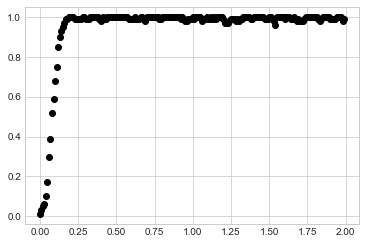

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.plot(check_times, prop_inf, 'o', color='black');
